### Data Analysis for SP500 data using moving averages

we use yfinance library  to download the S&P500 historical data 

historical data was import from csv file 

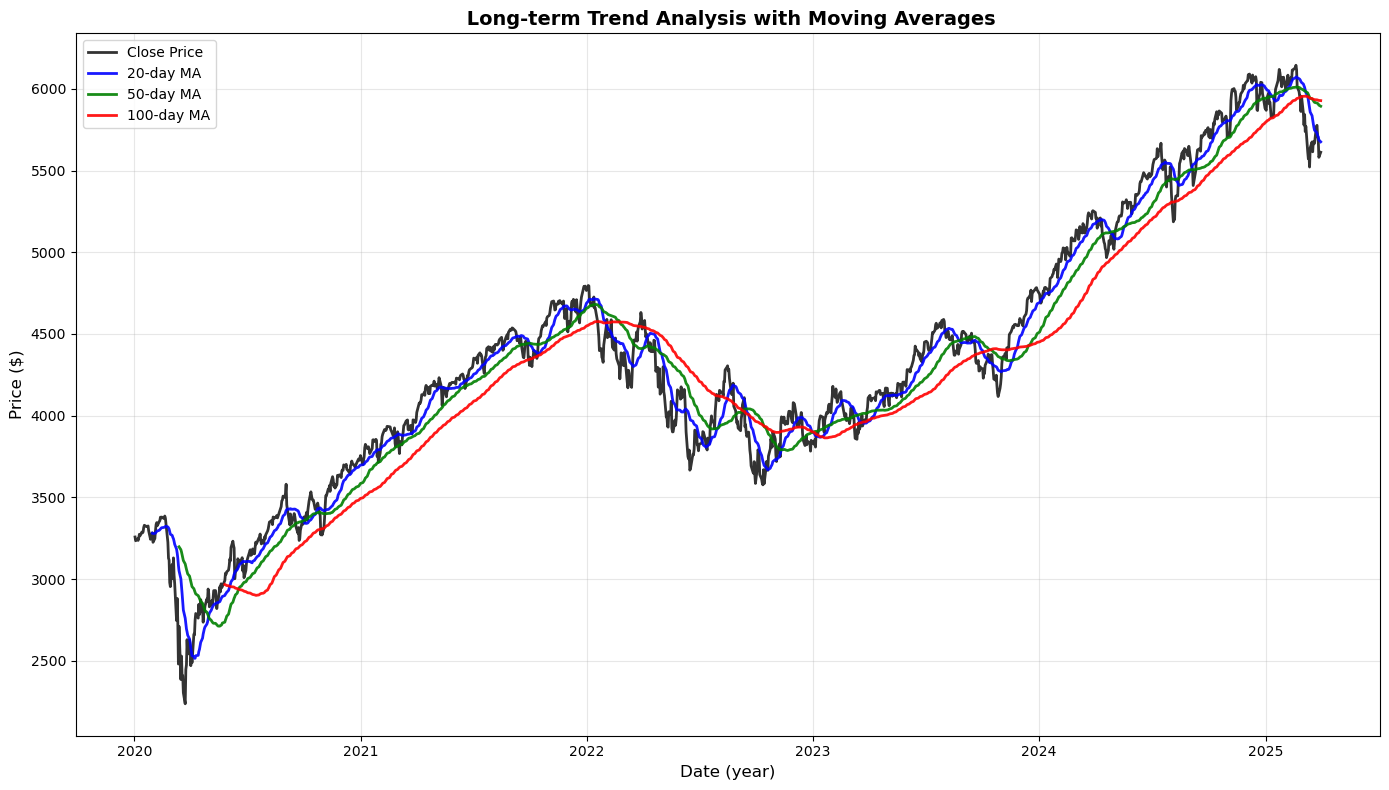

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def plot_sp500_long_term_trend(file_path='sp500.csv'):
    # Load data
    data = pd.read_csv(file_path)
    # Data preprocessing
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date').reset_index(drop=True)
    data.set_index('Date', inplace=True)
    
#### ---------Calculate moving averages---------------------------
    data['MA_20'] = data['Close'].rolling(window=20).mean()
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    data['MA_100'] = data['Close'].rolling(window=100).mean()
       
#### --------Plot---------------------------
    plt.figure(figsize=(14, 8))
    plt.plot(data.index, data['Close'], label='Close Price', linewidth=2, alpha=0.8, color='black')
    plt.plot(data.index, data['MA_20'], label='20-day MA', linewidth=2, alpha=0.9, color='blue')
    plt.plot(data.index, data['MA_50'], label='50-day MA', linewidth=2, alpha=0.9, color='green')
    plt.plot(data.index, data['MA_100'], label='100-day MA', linewidth=2, alpha=0.9, color='red')
    plt.title(' Long-term Trend Analysis with Moving Averages', fontsize=14, fontweight='bold')
    plt.xlabel('Date (year)', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
#### Run the plot
plot_sp500_long_term_trend('sp500.csv')

#### Volatility Analysis for SP500 data

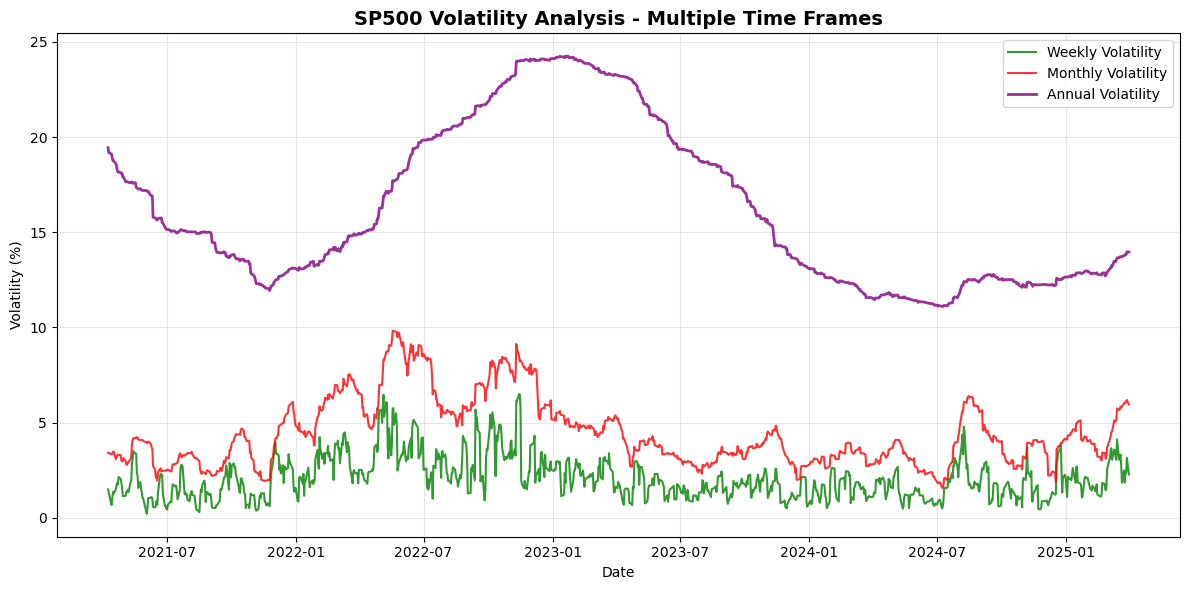

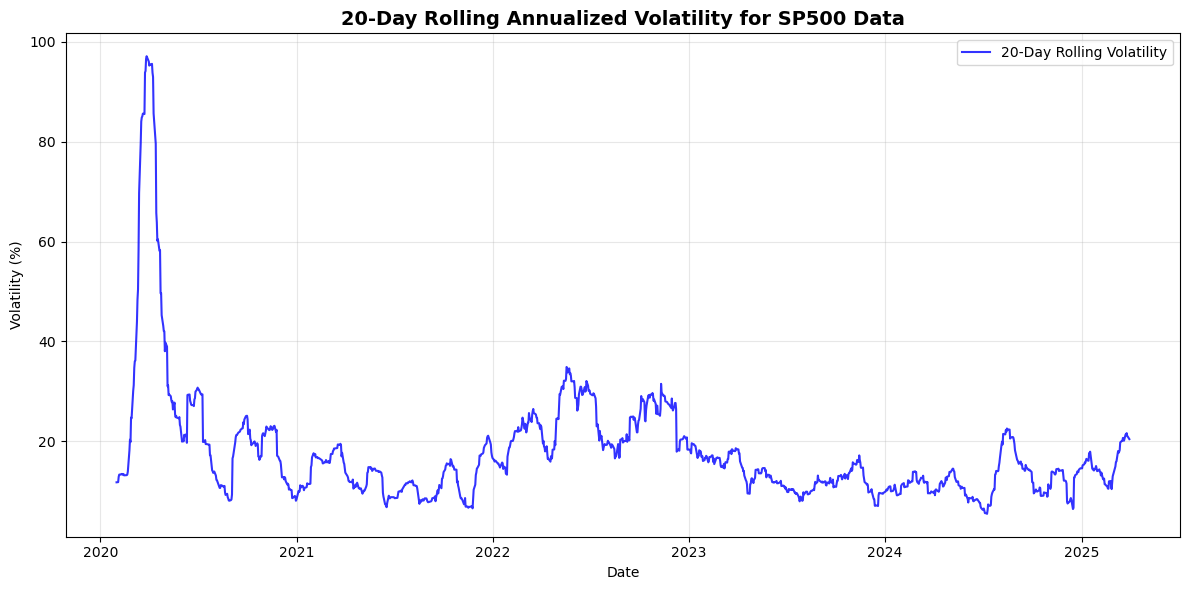

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load data
data = pd.read_csv('sp500.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').reset_index(drop=True)
data.set_index('Date', inplace=True)

# Calculate returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate different volatility measures
data['Daily_Volatility'] = data['Daily_Return'].rolling(window=1).std()
data['Weekly_Volatility'] = data['Daily_Return'].rolling(window=5).std() * np.sqrt(5)
data['Monthly_Volatility'] = data['Daily_Return'].rolling(window=21).std() * np.sqrt(21)
data['Annual_Volatility'] = data['Daily_Return'].rolling(window=252).std() * np.sqrt(252)

# Calculate rolling volatility (20-day window)
data['Rolling_Volatility'] = data['Daily_Return'].rolling(window=20).std() * np.sqrt(252)

# Select recent data for better visualization
recent_data = data.tail(1000)  # Last ~4 years of data

#  Plot Volatility Analysis ----------------------------------
plt.figure(figsize=(12, 6))
plt.plot(recent_data.index, recent_data['Weekly_Volatility'] * 100, 
         linewidth=1.5, alpha=0.8, label='Weekly Volatility', color='green')
plt.plot(recent_data.index, recent_data['Monthly_Volatility'] * 100, 
         linewidth=1.5, alpha=0.8, label='Monthly Volatility', color='red')
plt.plot(recent_data.index, recent_data['Annual_Volatility'] * 100, 
         linewidth=2, alpha=0.8, label='Annual Volatility', color='purple')
plt.title('SP500 Volatility Analysis - Multiple Time Frames', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#  Plot 20-Day Rolling Volatility ----------------------------------
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling_Volatility'] * 100, 
         linewidth=1.5, alpha=0.8, label='20-Day Rolling Volatility', color='blue')
plt.title('20-Day Rolling Annualized Volatility for SP500 Data', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Volatility Analysis statistics

In [34]:
current_vol = data['Rolling_Volatility'].iloc[-1]
avg_vol = data['Rolling_Volatility'].dropna().mean()
max_vol = data['Rolling_Volatility'].dropna().max()
min_vol = data['Rolling_Volatility'].dropna().min()

print("SP500 VOLATILITY STATISTICS")
print("=" * 45)
print(f"Current (20-day) Annualized Volatility: {current_vol*100:.2f}%")
print(f"Historical Average Annualized Volatility: {avg_vol*100:.2f}%")
print(f"Historical Maximum Annualized Volatility: {max_vol*100:.2f}%")
print(f"Historical Minimum Annualized Volatility: {min_vol*100:.2f}%")

SP500 VOLATILITY STATISTICS
Current (20-day) Annualized Volatility: 20.42%
Historical Average Annualized Volatility: 17.65%
Historical Maximum Annualized Volatility: 97.12%
Historical Minimum Annualized Volatility: 5.45%
